<a href="https://colab.research.google.com/github/Samridh-Pathela/Solar-Radiation-Prediction-using-Linear-Regression/blob/main/Solar_Radiation_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VISULAIZING AND EXAMINING DATA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("SolarPrediction.csv")



In [ ]:
# take a look at the dataset
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [ ]:
# summarise the data
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [ ]:
cdf = df[['Temperature','Radiation','Pressure']]
cdf.head(9)

,Temperature,Radiation,Pressure
0,48,1.21,30.46
1,48,1.21,30.46
2,48,1.23,30.46
3,48,1.21,30.46
4,48,1.17,30.46
5,48,1.21,30.46
6,49,1.20,30.46
7,49,1.24,30.46
8,49,1.23,30.46


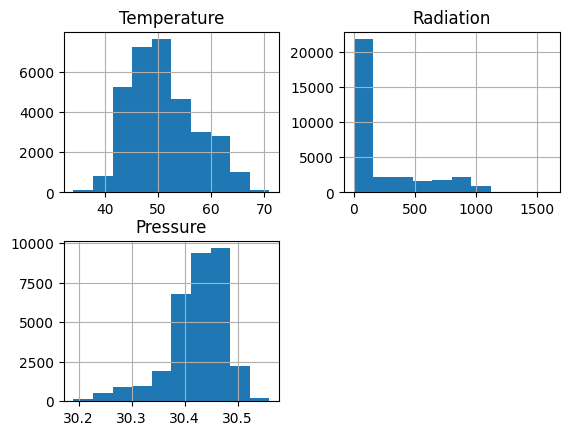

In [ ]:
viz = cdf[['Temperature','Radiation','Pressure']]
viz.hist()
plt.show()

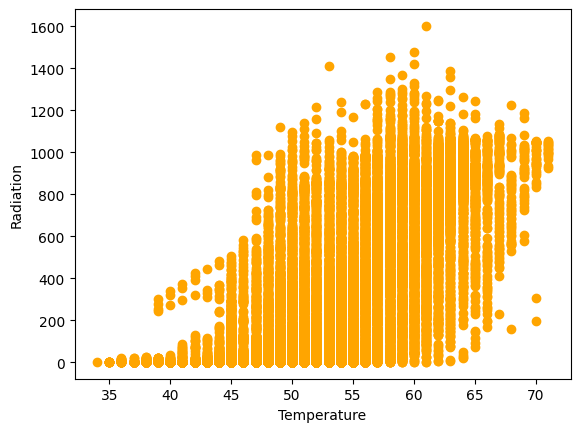

In [ ]:
#plotting histogram between temperature and radiation
plt.scatter(cdf.Temperature, cdf.Radiation, color='orange')
plt.xlabel("Temperature")
plt.ylabel("Radiation")
plt.show()

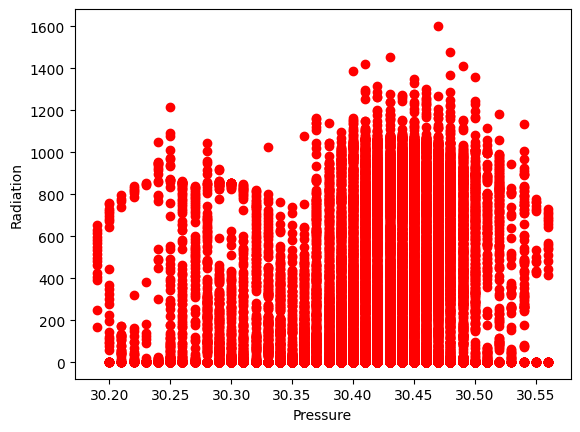

In [ ]:
#plotting histogram between temperature and radiation
plt.scatter(cdf.Pressure, cdf.Radiation, color='red')
plt.xlabel("Pressure")
plt.ylabel("Radiation")
plt.show()

**MODEL** **BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

#Independent variable
X = df[['Temperature', 'Pressure','Humidity', 'WindDirection(Degrees)', 'Speed']]
 #dependent variable
y = df['Radiation']
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [ ]:
#model building
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
l = LinearRegression()
l.fit(X_train,y_train)
print(l.intercept_)

21278.93017361764


In [ ]:
 predictions = l.predict(X_test)

In [ ]:
sse = np.sum((predictions - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)

In [ ]:
R_square = 1 - (sse/sst)
print('R square obtain for normal equation method is :',R_square)

R square obtain for normal equation method is : 0.5753301002825552


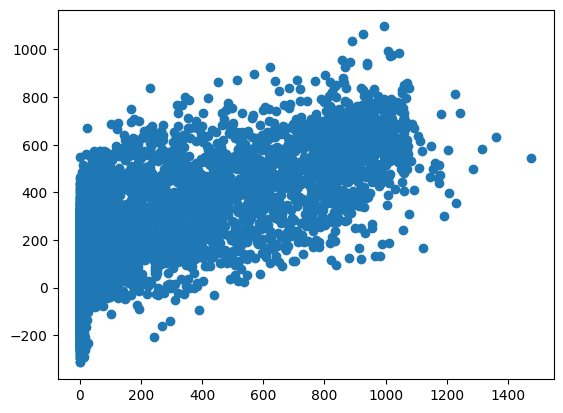

In [ ]:
plt.scatter(y_test,predictions)

<ipython-input-15-550730dc5ec8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions))


<Axes: xlabel='Radiation', ylabel='Density'>

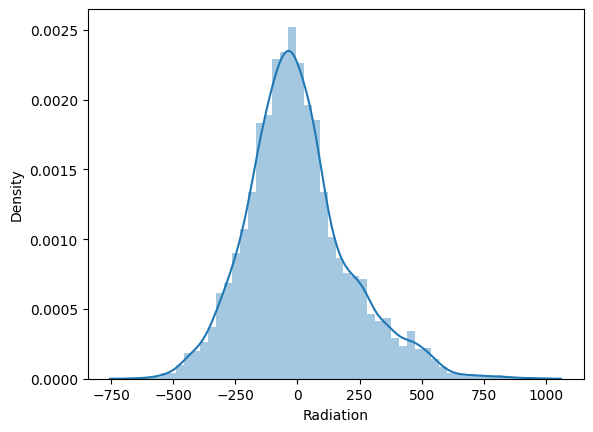

In [ ]:
sns.distplot((y_test-predictions))

In [ ]:
f = plt.figure(figsize=(14,5))

<Figure size 1400x500 with 0 Axes>

In [ ]:
a = f.add_subplot(121)

In [ ]:
# Check for Residual normality & mean
ax = f.add_subplot(122)

In [ ]:
sns.histplot((y_test - predictions),ax=ax,color='b')


<Axes: xlabel='Radiation', ylabel='Density'>

In [ ]:
ax.axvline((y_test - predictions).mean(),color='k',linestyle='--')

In [ ]:
ax.set_title('Check for Residual normality & mean: \n Residual error')


Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual error')

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 157.204915619783
MSE: 42744.72155343697
RMSE: 206.74796626191264
